In [37]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
base_dir = r'C:\Users\Aditya Kumar\ASD using Deep learning\consolidated'  

In [38]:

datagen = ImageDataGenerator(
     rescale=1./255,
    rotation_range=40,       
    width_shift_range=0.3,    
    height_shift_range=0.3,  
    shear_range=0.3,         
    zoom_range=0.3,           
    horizontal_flip=True,     
    fill_mode='nearest',      
    validation_split=0.2
    
)

In [39]:

train_generator = datagen.flow_from_directory(
    base_dir,                    
    target_size=(150, 150),       
    batch_size=32,
    class_mode='binary',          
    subset='training'              
)

Found 2524 images belonging to 2 classes.


In [40]:

validation_generator = datagen.flow_from_directory(
    base_dir,                    
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'           
)

Found 630 images belonging to 2 classes.


### fine tuning ###

In [35]:
from tensorflow.keras.optimizers import Adam

# Adjust learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# Add Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())


model.add(Dense(512, activation='relu'))
model.add(Dropout(0.7)) 
model.add(Dense(1, activation='sigmoid'))  
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [2]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential


base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers (to avoid overfitting)
for layer in base_model.layers:
    layer.trainable = False


model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid') 
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [5]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to your train, test, and validation folders
train_dir = r'C:\Users\Aditya Kumar\ASD using Deep learning\train'
valid_dir = r'C:\Users\Aditya Kumar\ASD using Deep learning\valid'
test_dir = r'C:\Users\Aditya Kumar\ASD using Deep learning\test'

# ImageDataGenerator for augmenting training data
train_datagen = ImageDataGenerator(
    rescale=1./255,              # Normalization
    rotation_range=40,           # Augmentations
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# No augmentation for validation/test sets, just normalization
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the images from the directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


Found 2654 images belonging to 2 classes.
Found 80 images belonging to 2 classes.
Found 280 images belonging to 2 classes.


In [6]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Load VGG16 pretrained model (without the top layer)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers to avoid overfitting
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of VGG16
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               6422784   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 21137729 (80.63 MB)
Trainable params: 6423041 (24.50 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [7]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=valid_generator,
    validation_steps=len(valid_generator),
    callbacks=[early_stopping]
)


Epoch 1/10
83/83 [==============================] - 472s 6s/step - loss: 0.6815 - accuracy: 0.6277 - val_loss: 0.4003 - val_accuracy: 0.9250
Epoch 2/10
83/83 [==============================] - 466s 6s/step - loss: 0.6010 - accuracy: 0.6839 - val_loss: 0.3362 - val_accuracy: 0.9250
Epoch 3/10
83/83 [==============================] - 463s 6s/step - loss: 0.5912 - accuracy: 0.6858 - val_loss: 0.3740 - val_accuracy: 0.9000
Epoch 4/10
83/83 [==============================] - 456s 5s/step - loss: 0.5665 - accuracy: 0.7121 - val_loss: 0.3028 - val_accuracy: 0.9125
Epoch 5/10
83/83 [==============================] - 454s 5s/step - loss: 0.5618 - accuracy: 0.7091 - val_loss: 0.2768 - val_accuracy: 0.9250
Epoch 6/10
83/83 [==============================] - 461s 6s/step - loss: 0.5544 - accuracy: 0.7129 - val_loss: 0.3337 - val_accuracy: 0.9250
Epoch 7/10
83/83 [==============================] - 478s 6s/step - loss: 0.5546 - accuracy: 0.7151 - val_loss: 0.2713 - val_accuracy: 0.9500
Epoch 8/10
83

In [8]:
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f'Test loss: {test_loss}, Test accuracy: {test_accuracy}')


9/9 [==============================] - 46s 5s/step - loss: 0.3484 - accuracy: 0.8714
Test loss: 0.34844955801963806, Test accuracy: 0.8714285492897034


In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
csv_file = 'ASD_Dataset.csv'
df = pd.read_csv(csv_file)

In [5]:
df.head()

,ID,Name,Age,Gender,ASD Diagnosis,Type of ASD,Communication Skills,Social Interaction,Repetitive Behaviors,Cognitive Skills,Sensory Sensitivities,Family History of ASD,Notes
0,1,Sam Lee,11,Male,No,-,Low,Moderate,Low,Moderate,High,No,NaN
1,2,Amy Wong,10,Female,Yes,Pervasive Development Disorder Not Otherwise S...,High,High,High,Low,High,No,NaN
2,3,Lily Chen,10,Male,No,-,Low,Moderate,Moderate,Low,High,No,NaN
3,4,Lily Chen,18,Male,No,-,Low,Moderate,Moderate,Moderate,High,No,NaN
4,5,Alex Kim,5,Female,Yes,Pervasive Development Disorder Not Otherwise S...,High,High,Low,Low,Moderate,Yes,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1000 non-null   int64  
 1   Name                   1000 non-null   object 
 2   Age                    1000 non-null   int64  
 3   Gender                 1000 non-null   object 
 4   ASD Diagnosis          1000 non-null   object 
 5   Type of ASD            1000 non-null   object 
 6   Communication Skills   1000 non-null   object 
 7   Social Interaction     1000 non-null   object 
 8   Repetitive Behaviors   1000 non-null   object 
 9   Cognitive Skills       1000 non-null   object 
 10  Sensory Sensitivities  1000 non-null   object 
 11  Family History of ASD  1000 non-null   object 
 12  Notes                  0 non-null      float64
dtypes: float64(1), int64(2), object(10)
memory usage: 101.7+ KB


In [7]:
df.isnull().sum()

ID                          0
Name                        0
Age                         0
Gender                      0
ASD Diagnosis               0
Type of ASD                 0
Communication Skills        0
Social Interaction          0
Repetitive Behaviors        0
Cognitive Skills            0
Sensory Sensitivities       0
Family History of ASD       0
Notes                    1000
dtype: int64

In [8]:
df = df.drop(columns = ['Notes'])

In [9]:
df = df.drop(columns = ['Name','ID'])

In [10]:
df.head()

,Age,Gender,ASD Diagnosis,Type of ASD,Communication Skills,Social Interaction,Repetitive Behaviors,Cognitive Skills,Sensory Sensitivities,Family History of ASD
0,11,Male,No,-,Low,Moderate,Low,Moderate,High,No
1,10,Female,Yes,Pervasive Development Disorder Not Otherwise S...,High,High,High,Low,High,No
2,10,Male,No,-,Low,Moderate,Moderate,Low,High,No
3,18,Male,No,-,Low,Moderate,Moderate,Moderate,High,No
4,5,Female,Yes,Pervasive Development Disorder Not Otherwise S...,High,High,Low,Low,Moderate,Yes


In [11]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Type of ASD'] = df['Type of ASD'].fillna(df['Type of ASD'].mode()[0])

In [12]:
df.isnull().sum()

Age                      0
Gender                   0
ASD Diagnosis            0
Type of ASD              0
Communication Skills     0
Social Interaction       0
Repetitive Behaviors     0
Cognitive Skills         0
Sensory Sensitivities    0
Family History of ASD    0
dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Type of ASD'] = le.fit_transform(df['Type of ASD'])
df['Family History of ASD'] = le.fit_transform(df['Family History of ASD'])


In [14]:
X = df.drop(columns=['ASD Diagnosis', 'Type of ASD'])
y = df['Type of ASD']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

0    581
2    107
3     96
5     79
1     69
4     68
Name: Type of ASD, dtype: int64


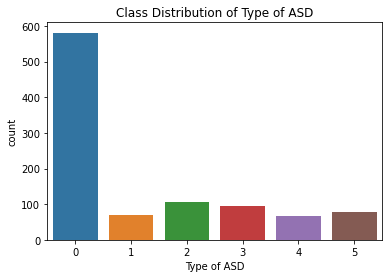

In [16]:
print(df['Type of ASD'].value_counts())

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Type of ASD', data=df)
plt.title('Class Distribution of Type of ASD')
plt.show()

In [19]:
from sklearn.utils import resample

majority_class = df[df['Type of ASD'] == 0]
minority_classes = df[df['Type of ASD'] != 0]


majority_downsampled = resample(majority_class, 
                                replace=False,    
                                n_samples=len(minority_classes),
                                random_state=42)  

df_downsampled = pd.concat([majority_downsampled, minority_classes])


df_downsampled = df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)


print("Class distribution after undersampling:")
print(df_downsampled['Type of ASD'].value_counts())


X = df_downsampled.drop(columns=['Type of ASD', 'ASD Diagnosis'])
y = df_downsampled['Type of ASD']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Class distribution after undersampling:
0    419
2    107
3     96
5     79
1     69
4     68
Name: Type of ASD, dtype: int64


0    581
2    107
3     96
5     79
1     69
4     68
Name: Type of ASD, dtype: int64


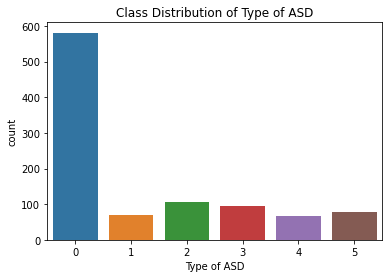

In [20]:
# Check class distribution
print(df['Type of ASD'].value_counts())

# Visualize class imbalance
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Type of ASD', data=df)
plt.title('Class Distribution of Type of ASD')
plt.show()

In [21]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)

X_resampled, y_resampled = undersample.fit_resample(X, y)


print("Class distribution after undersampling:", Counter(y_resampled))


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


Class distribution after undersampling: Counter({0: 68, 1: 68, 2: 68, 3: 68, 4: 68, 5: 68})


0    581
2    107
3     96
5     79
1     69
4     68
Name: Type of ASD, dtype: int64


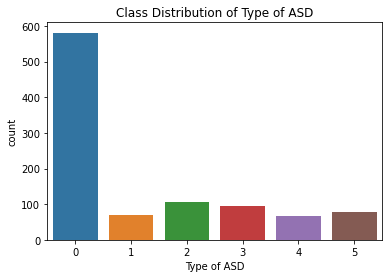

In [22]:
print(df['Type of ASD'].value_counts())


import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Type of ASD', data=df)
plt.title('Class Distribution of Type of ASD')
plt.show()

In [23]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['Gender', 'Communication Skills', 'Social Interaction', 'Repetitive Behaviors', 'Cognitive Skills', 'Sensory Sensitivities']

df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

print(df_encoded.head())

X = df_encoded.drop(columns=['Type of ASD', 'ASD Diagnosis'])  # Features
y = df_encoded['Type of ASD']  # Target


   Age ASD Diagnosis  Type of ASD  Family History of ASD  Gender_1  \
0   11            No            0                      0         1   
1   10           Yes            4                      0         0   
2   10            No            0                      0         1   
3   18            No            0                      0         1   
4    5           Yes            4                      1         0   

   Communication Skills_Low  Communication Skills_Moderate  \
0                         1                              0   
1                         0                              0   
2                         1                              0   
3                         1                              0   
4                         0                              0   

   Social Interaction_Low  Social Interaction_Moderate  \
0                       0                            1   
1                       0                            0   
2                       0       

In [24]:
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)
print("Class distribution after SMOTE + Tomek Links:", Counter(y_resampled))

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


Class distribution after SMOTE + Tomek Links: Counter({4: 566, 2: 561, 5: 561, 1: 558, 3: 555, 0: 509})


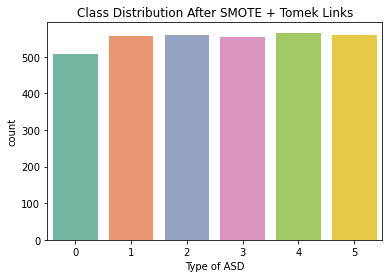

In [25]:
# Directly use countplot on y_resampled
sns.countplot(x=y_resampled, palette='Set2')
plt.title('Class Distribution After SMOTE + Tomek Links')
plt.show()

In [26]:
df.head()

,Age,Gender,ASD Diagnosis,Type of ASD,Communication Skills,Social Interaction,Repetitive Behaviors,Cognitive Skills,Sensory Sensitivities,Family History of ASD
0,11,1,No,0,Low,Moderate,Low,Moderate,High,0
1,10,0,Yes,4,High,High,High,Low,High,0
2,10,1,No,0,Low,Moderate,Moderate,Low,High,0
3,18,1,No,0,Low,Moderate,Moderate,Moderate,High,0
4,5,0,Yes,4,High,High,Low,Low,Moderate,1


In [27]:
df.head()

,Age,Gender,ASD Diagnosis,Type of ASD,Communication Skills,Social Interaction,Repetitive Behaviors,Cognitive Skills,Sensory Sensitivities,Family History of ASD
0,11,1,No,0,Low,Moderate,Low,Moderate,High,0
1,10,0,Yes,4,High,High,High,Low,High,0
2,10,1,No,0,Low,Moderate,Moderate,Low,High,0
3,18,1,No,0,Low,Moderate,Moderate,Moderate,High,0
4,5,0,Yes,4,High,High,Low,Low,Moderate,1


In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print(X_train_scaled.head())



        Age  Family History of ASD  Gender_1  Communication Skills_Low  \
0 -0.046561              -0.756602  1.340003                  1.966633   
1 -0.302145              -0.756602 -0.746267                 -0.508483   
2  1.742527              -0.756602  1.340003                  1.966633   
3 -1.580065               1.321699 -0.746267                 -0.508483   
4 -1.580065              -0.756602 -0.746267                 -0.508483   

   Communication Skills_Moderate  Social Interaction_Low  \
0                      -0.545463               -0.518818   
1                      -0.545463               -0.518818   
2                      -0.545463               -0.518818   
3                      -0.545463               -0.518818   
4                       1.833303               -0.518818   

   Social Interaction_Moderate  Repetitive Behaviors_Low  \
0                     2.058480                  2.044497   
1                    -0.485795                 -0.489118   
2             

In [30]:
df.head()

,Age,Gender,ASD Diagnosis,Type of ASD,Communication Skills,Social Interaction,Repetitive Behaviors,Cognitive Skills,Sensory Sensitivities,Family History of ASD
0,11,1,No,0,Low,Moderate,Low,Moderate,High,0
1,10,0,Yes,4,High,High,High,Low,High,0
2,10,1,No,0,Low,Moderate,Moderate,Low,High,0
3,18,1,No,0,Low,Moderate,Moderate,Moderate,High,0
4,5,0,Yes,4,High,High,Low,Low,Moderate,1


In [43]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled,y_resampled)

RandomForestClassifier(random_state=42)

In [44]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = rf_model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9380664652567976
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98       109
           1       0.88      0.96      0.92       106
           2       0.94      0.94      0.94       125
           3       0.95      0.93      0.94       108
           4       0.96      0.91      0.94       111
           5       0.91      0.93      0.92       103

    accuracy                           0.94       662
   macro avg       0.94      0.94      0.94       662
weighted avg       0.94      0.94      0.94       662



In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
}
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_resampled)

best_rf_model = grid_search.best_estimator_


In [47]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()

In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search.fit(X_train_scaled, y_resampled)

print("Best hyperparameters:", grid_search.best_params_)

y_pred = grid_search.best_estimator_.predict(X_test_scaled)
print("Accuracy after tuning:", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best hyperparameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy after tuning: 0.9395770392749244


In [49]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, X_train_scaled, y_resampled, cv=5)

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [0.62990937 0.77643505 0.7734139  0.79003021 0.77039275]
Mean Cross-Validation Score: 0.7480362537764351


In [51]:
df.head()

,Age,Gender,ASD Diagnosis,Type of ASD,Communication Skills,Social Interaction,Repetitive Behaviors,Cognitive Skills,Sensory Sensitivities,Family History of ASD
0,11,1,No,0,Low,Moderate,Low,Moderate,High,0
1,10,0,Yes,4,High,High,High,Low,High,0
2,10,1,No,0,Low,Moderate,Moderate,Low,High,0
3,18,1,No,0,Low,Moderate,Moderate,Moderate,High,0
4,5,0,Yes,4,High,High,Low,Low,Moderate,1


In [59]:
new_data = [[5, 1, 3, 2, 2, 2, 1,4,2,4,4,4,2]]
new_data_scaled = scaler.transform(new_data)

# Predict the type of ASD
asd_type_pred = rf_model.predict(new_data_scaled)
print("Predicted ASD Type:", asd_type_pred)


Predicted ASD Type: [0]


C:\Users\Aditya Kumar\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Aditya Kumar\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
